In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import brier_score_loss

# **Data Merging**

In [3]:
dfs = []

for year in range(2011, 2016):
    for num in range(1, 5):
        try:
            df = pd.read_csv(f"Prediction of Mortality for Gender Data/TexasQ{num}_{year}.csv")
            dfs.append(df)
        except FileNotFoundError:
            continue

df = pd.concat(dfs, ignore_index=True)


/tmp/ipykernel_2929592/3381012810.py:6: DtypeWarning: Columns (11,12,15,16,22,39,81,82,83,84,85,86,93,95,97,99,101,227,229,230,231,232,233,234,235,237,238,239,241,243,245,247,249,251,252,253,254,255,256,263,264,265,266,267,271,273,275,277,279,281,283,295,296,297,299,300,301,302) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"Prediction of Mortality for Gender Data/TexasQ{num}_{year}.csv")
/tmp/ipykernel_2929592/3381012810.py:6: DtypeWarning: Columns (11,15,16,22,85,86,91,93,95,97,99,101,103,109,112,115,118,119,121,227,228,229,231,232,233,234,235,236,237,239,240,241,243,245,247,249,251,252,253,263,264,265,266,267,271,273,275,277,279,281,295,296,297,299,300,301,302) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"Prediction of Mortality for Gender Data/TexasQ{num}_{year}.csv")
/tmp/ipykernel_2929592/3381012810.py:6: DtypeWarning: Columns (11,12,15,16,22,39,81,82,83,84,85,86,91,93,95,97,99,101,1

# Applying Logistic regression model with Lasso to predict mortality.
# Calculating AUC-ROC with 5-Fold cross validation and and Brier Score

In [4]:
X = df[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race','sex_code']]#input

y = (df['pat_status']).astype(int)#output

logreg = LogisticRegression(penalty='l1',solver='liblinear')


logreg.fit(X, y)

y_predict1 = logreg.predict(X)
cv = StratifiedKFold(n_splits=5,shuffle=False)
tprs = []
aucslrl = []
bsLRL = []
mean_fpr = np.linspace(0,1,100)
i = 1


for train,test in cv.split(X,y):
    prediction = logreg.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    logreg.score(X.iloc[test], y[test])
   
    bs=brier_score_loss(y[test], prediction[:, 1])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucslrl.append(roc_auc)
    bsLRL.append(bs)
    print(np.exp(logreg.coef_))


/tmp/ipykernel_2929592/1819124664.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


[[0.16624907 1.09264494 0.95556945 0.94283481 1.01148398 0.95069403
  0.856369   0.92736203 0.96418725 1.02558012]]


/tmp/ipykernel_2929592/1819124664.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


[[0.17324273 1.09108702 0.95302423 0.94287262 1.01319924 0.95163049
  0.85591516 0.93719758 0.9593396  1.03031994]]


/tmp/ipykernel_2929592/1819124664.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


[[0.17453353 1.09100748 0.93779783 0.94247805 1.01168647 0.95457981
  0.85169567 0.93744213 0.95291831 1.03196665]]


/tmp/ipykernel_2929592/1819124664.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


[[0.17769685 1.09291686 0.97874591 0.94331802 1.01188582 0.94857785
  0.85228433 0.93429351 0.95634476 1.02687828]]
[[0.18098234 1.08986149 0.96924909 0.94531069 1.01245964 0.94827675
  0.8559128  0.93876183 0.9616251  1.03005755]]


/tmp/ipykernel_2929592/1819124664.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


In [5]:
print("Applying Logistic regression model with Lasso\n",aucslrl)
print("Applying Brier Score with Logistic regression model with Lasso\n",bsLRL)

Applying Logistic regression model with Lasso
 [0.7758635170357575, 0.7912757023750271, 0.7946708757482406, 0.8003891863567044, 0.8075774254909001]
Applying Brier Score with Logistic regression model with Lasso
 [0.06503519413626349, 0.06401924589917639, 0.06356229306022683, 0.06295652222779534, 0.06266608439641545]


In [6]:
sorted_scoresauc = np.array(aucslrl)
sorted_scoresbs = np.array(bsLRL)
sorted_scoresauc.sort()
sorted_scoresbs.sort()
# we used to 0.025 and 0.975 to get 95% confidence interval instead.
confidence_lowerauc = sorted_scoresauc[int(0.025 * len(aucslrl))]
confidence_upperauc = sorted_scoresauc[int(0.975 * len(aucslrl))]
print("Logistic Regression with Lasso AUC(95%CI)for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lowerauc, confidence_upperauc))
confidence_lowerbs = sorted_scoresbs[int(0.025 * len(bsLRL))]
confidence_upperbs = sorted_scoresbs[int(0.975 * len(bsLRL))]
print("Logistic Regression with Lasso Brier score (95%CI): [{:0.3f} - {:0.3}]".format(
    confidence_lowerbs, confidence_upperbs))

Logistic Regression with Lasso AUC(95%CI)for the score: [0.776 - 0.808]
Logistic Regression with Lasso Brier score (95%CI): [0.063 - 0.065]


# **Applying Logistic regression model with Ridge to predict mortality.**
# **Calculating AUC-ROC with 5-Fold cross validation and and Brier Score**

In [7]:
X = df[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race','sex_code']]#input

y = (df['pat_status']).astype(int)#output

logreg = LogisticRegression(penalty='l2',solver='liblinear')


logreg.fit(X, y)

y_predict1 = logreg.predict(X)
cv = StratifiedKFold(n_splits=5,shuffle=False)
tprs = []
aucslrr = []
bsLRR=[]
mean_fpr = np.linspace(0,1,100)
i = 1


for train,test in cv.split(X,y):
    prediction = logreg.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    
    logreg.score(X.iloc[test], y[test])
    bs=brier_score_loss(y[test], prediction[:, 1])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucslrr.append(roc_auc)
    bsLRR.append(bs)
    print(np.exp(logreg.coef_))


/tmp/ipykernel_2929592/3839378468.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


[[0.16644354 1.09265384 0.95677665 0.94300405 1.01147266 0.95068139
  0.85637208 0.92733295 0.9650784  1.02564406]]


/tmp/ipykernel_2929592/3839378468.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


[[0.17222674 1.09112346 0.9509278  0.94250659 1.01324505 0.95166862
  0.85597352 0.93721589 0.95688847 1.02965756]]


/tmp/ipykernel_2929592/3839378468.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


[[0.17434162 1.09102178 0.93751077 0.94243648 1.01169512 0.95456943
  0.85170867 0.93750628 0.9524622  1.03196101]]


/tmp/ipykernel_2929592/3839378468.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


[[0.17761543 1.09292254 0.978675   0.94332496 1.01189595 0.94856954
  0.85231026 0.93429669 0.95634321 1.02706215]]
[[0.17976543 1.08990638 0.9667623  0.9448319  1.01253092 0.94826265
  0.85594735 0.93879829 0.95909148 1.02934104]]


/tmp/ipykernel_2929592/3839378468.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


In [8]:
print("Applying Logistic regression model with Ridge\n",aucslrr)
print("Applying Brier Score with Logistic regression model with Ridge\n",bsLRR)

Applying Logistic regression model with Ridge
 [0.7758623740598374, 0.7912742797754799, 0.7946687925271267, 0.8003928522195656, 0.807617168308096]
Applying Brier Score with Logistic regression model with Ridge
 [0.06503396989977706, 0.06401933259761086, 0.06356142221912958, 0.06295573158134934, 0.06265934881253594]


In [9]:
sorted_scoreslrrauc = np.array(aucslrr)
sorted_scoreslrrbs = np.array(bsLRL)
sorted_scoreslrrauc.sort()
sorted_scoreslrrbs.sort()
# we used to 0.025 and 0.975 to get 95% confidence interval instead.
confidence_lowerlrrauc = sorted_scoreslrrauc[int(0.025 * len(aucslrr))]
confidence_upperlrrauc = sorted_scoreslrrauc[int(0.975 * len(aucslrr))]
print("Logistic Regression with Ridge AUC(95%CI)for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lowerlrrauc, confidence_upperlrrauc))
confidence_lowerlrrbs = sorted_scoreslrrbs[int(0.025 * len(bsLRL))]
confidence_upperlrrbs = sorted_scoreslrrbs[int(0.975 * len(bsLRL))]
print("Logistic Regression with Ridge Brier score (95%CI): [{:0.3f} - {:0.3}]".format(
    confidence_lowerbs, confidence_upperbs))

Logistic Regression with Ridge AUC(95%CI)for the score: [0.776 - 0.808]
Logistic Regression with Ridge Brier score (95%CI): [0.063 - 0.065]


# **Applying Gradient Boosting Model to predict mortality.**
# **Calculating AUC-ROC with 5-Fold cross validation and and Brier Score**

/tmp/ipykernel_2929592/3666192417.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/3666192417.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/3666192417.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/3666192417.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/3666192417.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


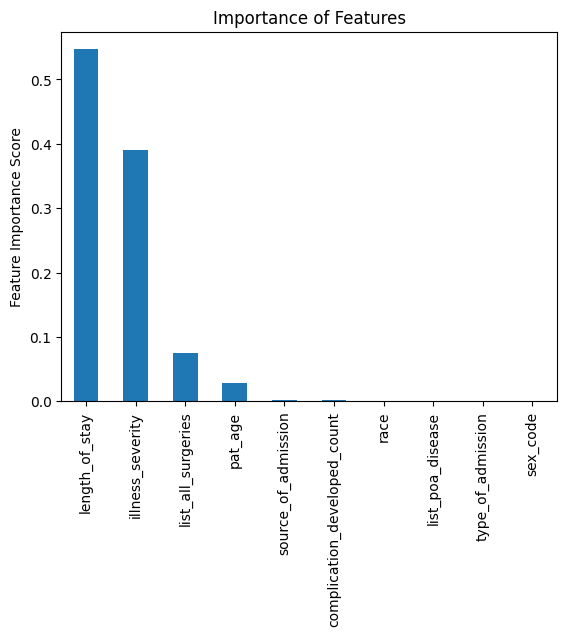

In [10]:
#GradientBoostingClassifier

import numpy as np
from sklearn.metrics import brier_score_loss, roc_auc_score

X = df[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race','sex_code']]#input

y = (df['pat_status']).astype(int)#output


clf  = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)

clf.fit(X,y)

y_predict1 = clf.predict(X)
cv = StratifiedKFold(n_splits=5,shuffle=False)
tprs = []
aucsGBC = []
bsGBC= []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    prediction = clf.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    
    clf.score(X.iloc[test], y[test])
    bs=brier_score_loss(y[test], prediction[:, 1])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucsGBC.append(roc_auc)
    bsGBC.append(bs)
    predictors=list(X.iloc[train])
    feat_imp = pd.Series(clf.feature_importances_, predictors).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Importance of Features')
    plt.ylabel('Feature Importance Score')


In [11]:
print("Applying Gradient Boosting Model\n",aucsGBC)
print("Applying Brier Score with Gradient Boosting Model\n",bsGBC)

Applying Gradient Boosting Model
 [0.8205776364915288, 0.8302771251402064, 0.832882193156326, 0.8385689263347218, 0.8413040903676288]
Applying Brier Score with Gradient Boosting Model
 [0.0586628012409728, 0.057799353113999155, 0.05698476702641297, 0.05635439851277628, 0.05609575968744975]


In [12]:
sorted_scoresGBCauc = np.array(aucsGBC)
sorted_scoresGBCbs = np.array(bsGBC)
sorted_scoresGBCauc.sort()
sorted_scoresGBCbs.sort()
# we used to 0.025 and 0.975 to get 95% confidence interval instead.
confidence_lowerGBCauc = sorted_scoresGBCauc[int(0.025 * len(aucsGBC))]
confidence_upperGBCauc = sorted_scoresGBCauc[int(0.975 * len(aucsGBC))]
print("Logistic Regression with Lasso AUC(95%CI)for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lowerGBCauc, confidence_upperGBCauc))
confidence_lowerGBCbs = sorted_scoresGBCbs[int(0.025 * len(bsGBC))]
confidence_upperGBCbs = sorted_scoresGBCbs[int(0.975 * len(bsGBC))]
print("Logistic Regression with Lasso Brier score (95%CI): [{:0.3f} - {:0.3}]".format(
    confidence_lowerGBCbs, confidence_upperGBCbs))

Logistic Regression with Lasso AUC(95%CI)for the score: [0.821 - 0.841]
Logistic Regression with Lasso Brier score (95%CI): [0.056 - 0.0587]


In [13]:
print("Applying Logistic regression model with Lasso\n",aucslrl)
print("Applying Logistic regression model with Ridge\n",aucslrr)
print("Applying Brier Score with Gradient Boosting Model\n",aucsGBC)
print("\nApplying Brier Score with Logistic regression model with Lasso\n",bsLRL)
print("Applying Brier Score with Logistic regression model with Ridge\n",bsLRR)
print("Applying Brier Score with Gradient Boosting Model\n",bsGBC)

Applying Logistic regression model with Lasso
 [0.7758635170357575, 0.7912757023750271, 0.7946708757482406, 0.8003891863567044, 0.8075774254909001]
Applying Logistic regression model with Ridge
 [0.7758623740598374, 0.7912742797754799, 0.7946687925271267, 0.8003928522195656, 0.807617168308096]
Applying Brier Score with Gradient Boosting Model
 [0.8205776364915288, 0.8302771251402064, 0.832882193156326, 0.8385689263347218, 0.8413040903676288]

Applying Brier Score with Logistic regression model with Lasso
 [0.06503519413626349, 0.06401924589917639, 0.06356229306022683, 0.06295652222779534, 0.06266608439641545]
Applying Brier Score with Logistic regression model with Ridge
 [0.06503396989977706, 0.06401933259761086, 0.06356142221912958, 0.06295573158134934, 0.06265934881253594]
Applying Brier Score with Gradient Boosting Model
 [0.0586628012409728, 0.057799353113999155, 0.05698476702641297, 0.05635439851277628, 0.05609575968744975]


# **Applying Logistic Regression Model with Lasso for each Female to predict mortality.**
# **Calculating AUC-ROC with 5-Fold cross validation**

In [14]:
dfl1F = df[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race','sex_code','pat_status']].copy()
dfl1F=df.loc[df['sex_code'] == 1]
dfl1F = dfl1F.reset_index(drop=True)

X = dfl1F[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race']]#input

y = (dfl1F['pat_status']).astype(int)#output

logreg = LogisticRegression(penalty='l1',solver='liblinear')


logreg.fit(X, y)

y_predict1 = logreg.predict(X)
cv = StratifiedKFold(n_splits=5,shuffle=False)
tprs = []
aucsl1F = []
bsLRLF = []
mean_fpr = np.linspace(0,1,100)
i = 1


for train,test in cv.split(X,y):
    prediction = logreg.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    logreg.score(X.iloc[test], y[test])
    bs=brier_score_loss(y[test], prediction[:, 1])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucsl1F.append(roc_auc)
    bsLRLF.append(bs)

/tmp/ipykernel_2929592/3059685281.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/3059685281.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/3059685281.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/3059685281.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/3059685281.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


# **Applying Logistic regression model with Lasso for each Man to predict mortality.**
# **Calculating AUC-ROC with 5-Fold cross validation**

In [15]:
dfl1M = df[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race','sex_code','pat_status']].copy()
dfl1M=df.loc[df['sex_code'] == 0]
dfl1M = dfl1M.reset_index(drop=True)

X = dfl1M[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race']]#input

y = (dfl1M['pat_status']).astype(int)#output

logreg = LogisticRegression(penalty='l1',solver='liblinear')


logreg.fit(X, y)

y_predict1 = logreg.predict(X)
cv = StratifiedKFold(n_splits=5,shuffle=False)
tprs = []
aucsl1M = []
bsLRLM = []
mean_fpr = np.linspace(0,1,100)
i = 1


for train,test in cv.split(X,y):
    prediction = logreg.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    logreg.score(X.iloc[test], y[test])
    bs=brier_score_loss(y[test], prediction[:, 1])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucsl1M.append(roc_auc)
    bsLRLM.append(bs)


/tmp/ipykernel_2929592/3413163292.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/3413163292.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/3413163292.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/3413163292.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/3413163292.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


In [16]:
print("Applying Logistic regression model with Lasso for each Female to predict mortality\n",aucsl1F)
print("Applying  Brier Score with Logistic regression model with Lasso for each Female to predict mortality\n",bsLRLF)
print("Applying Logistic regression model with Lasso for each Man to predict mortality\n",aucsl1M)
print("Applying Brier Score with Logistic regression model with Lasso for each Man to predict mortality\n",bsLRLM)

Applying Logistic regression model with Lasso for each Female to predict mortality
 [0.7760620920054281, 0.7915835308504628, 0.7938250996898157, 0.8013583655546146, 0.8088217724212051]
Applying  Brier Score with Logistic regression model with Lasso for each Female to predict mortality
 [0.06189786906907122, 0.060892828457689424, 0.06056203089972477, 0.05992995197687629, 0.05948906845758387]
Applying Logistic regression model with Lasso for each Man to predict mortality
 [0.77491080022407, 0.7904363347500122, 0.7942982750964288, 0.7992165318809918, 0.8056996216378136]
Applying Brier Score with Logistic regression model with Lasso for each Man to predict mortality
 [0.06843981672947241, 0.0673889929884961, 0.06687983043982189, 0.06623671033180618, 0.0660819291503878]


In [17]:
sorted_scoresLRLFauc = np.array(aucsl1F)
sorted_scoresLRLFbs = np.array(bsLRLF)
sorted_scoresLRLFauc.sort()
sorted_scoresLRLFbs.sort()
# we used to 0.025 and 0.975 to get 95% confidence interval instead.
confidence_lowerLRLFauc = sorted_scoresLRLFauc[int(0.025 * len(aucsl1F))]
confidence_upperLRLFauc = sorted_scoresLRLFauc[int(0.975 * len(aucsl1F))]
print("Logistic Regression with Lasso for Female AUC(95%CI)for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lowerLRLFauc, confidence_upperLRLFauc))
confidence_lowerLRLFbs = sorted_scoresLRLFbs[int(0.025 * len(bsLRLF))]
confidence_upperLRLFbs = sorted_scoresLRLFbs[int(0.975 * len(bsLRLF))]
print("Logistic Regression with Lasso for Female Brier score (95%CI): [{:0.3f} - {:0.3}]".format(
    confidence_lowerLRLFbs, confidence_upperLRLFbs))

sorted_scoresLRLMauc = np.array(aucsl1M)
sorted_scoresLRLMbs = np.array(bsLRLM)
sorted_scoresLRLMauc.sort()
sorted_scoresLRLMbs.sort()
# we used to 0.025 and 0.975 to get 95% confidence interval instead.
confidence_lowerLRLMauc = sorted_scoresLRLMauc[int(0.025 * len(aucsl1M))]
confidence_upperLRLMauc = sorted_scoresLRLMauc[int(0.975 * len(aucsl1M))]
print("Logistic Regression with Lasso for Men AUC(95%CI)for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lowerLRLMauc, confidence_upperLRLMauc))
confidence_lowerLRLMbs = sorted_scoresLRLMbs[int(0.025 * len(bsLRLM))]
confidence_upperLRLMbs = sorted_scoresLRLMbs[int(0.975 * len(bsLRLM))]
print("Logistic Regression with Lasso for Men Brier score (95%CI): [{:0.3f} - {:0.3}]".format(
    confidence_lowerLRLMbs, confidence_upperLRLMbs))

Logistic Regression with Lasso for Female AUC(95%CI)for the score: [0.776 - 0.809]
Logistic Regression with Lasso for Female Brier score (95%CI): [0.059 - 0.0619]
Logistic Regression with Lasso for Men AUC(95%CI)for the score: [0.775 - 0.806]
Logistic Regression with Lasso for Men Brier score (95%CI): [0.066 - 0.0684]


# **Applying Logistic regression model with Ridge for each Female to predict mortality.**
# **Calculating AUC-ROC with 5-Fold cross validation**

In [18]:
dfl2F = df[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race','sex_code','pat_status']].copy()
dfl2F=df.loc[df['sex_code'] == 1]
dfl2F = dfl2F.reset_index(drop=True)

X = dfl2F[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race']]#input

y = (dfl2F['pat_status']).astype(int)#output

logreg = LogisticRegression(penalty='l2',solver='liblinear')


logreg.fit(X, y)

y_predict1 = logreg.predict(X)
cv = StratifiedKFold(n_splits=5,shuffle=False)
tprs = []
aucsl2F = []
bsLRRF = []
mean_fpr = np.linspace(0,1,100)
i = 1


for train,test in cv.split(X,y):
    prediction = logreg.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    logreg.score(X.iloc[test], y[test])
    bs=brier_score_loss(y[test], prediction[:, 1])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucsl2F.append(roc_auc)
    bsLRRF.append(bs)


/tmp/ipykernel_2929592/827873577.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/827873577.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/827873577.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/827873577.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/827873577.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


# **Applying Logistic regression model with Ridge for each Man to predict mortality.**
# **Calculating AUC-ROC with 5-Fold cross validation**

In [19]:
dfl2M = df[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race','sex_code','pat_status']].copy()
dfl2M=df.loc[df['sex_code'] == 0]
dfl2M = dfl2M.reset_index(drop=True)

X = dfl2M[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race']]#input

y = (dfl2M['pat_status']).astype(int)#output

logreg = LogisticRegression(penalty='l2',solver='liblinear')


logreg.fit(X, y)

y_predict1 = logreg.predict(X)
cv = StratifiedKFold(n_splits=5,shuffle=False)
tprs = []
aucsl2M = []
bsLRRM = []
mean_fpr = np.linspace(0,1,100)
i = 1


for train,test in cv.split(X,y):
    prediction = logreg.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    logreg.score(X.iloc[test], y[test])
    bs=brier_score_loss(y[test], prediction[:, 1])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucsl2M.append(roc_auc)
    bsLRRM.append(bs)
    

/tmp/ipykernel_2929592/2588430070.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/2588430070.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/2588430070.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/2588430070.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/2588430070.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


In [20]:
print("Applying Logistic regression model with Ridge for each Female to predict mortality\n",aucsl2F)
print("Applying Brier Score with Logistic regression model with Ridge for each Female to predict mortality\n",bsLRRF)
print("Applying Logistic regression model with Ridge for each Man to predict mortality\n",aucsl2M)
print("Applying Brier Score with Logistic regression model with Ridge for each Man to predict mortality\n",bsLRRM)

Applying Logistic regression model with Ridge for each Female to predict mortality
 [0.7760328508138711, 0.7915992708877633, 0.7938292736706465, 0.8013542087191344, 0.8088389094366717]
Applying Brier Score with Logistic regression model with Ridge for each Female to predict mortality
 [0.06190189541898443, 0.06089339856506567, 0.060561318238564324, 0.05992488663648095, 0.059480190318040346]
Applying Logistic regression model with Ridge for each Man to predict mortality
 [0.7749006427497841, 0.7903977108454338, 0.794311640067149, 0.7992427378310225, 0.8056988448523426]
Applying Brier Score with Logistic regression model with Ridge for each Man to predict mortality
 [0.06844114046708018, 0.06738860908783924, 0.0668761368248241, 0.06623007378478567, 0.066082038531666]


In [21]:
sorted_scoresLRRFauc = np.array(aucsl2F)
sorted_scoresLRRFbs = np.array(bsLRRF)
sorted_scoresLRRFauc.sort()
sorted_scoresLRRFbs.sort()
# we used to 0.025 and 0.975 to get 95% confidence interval instead.
confidence_lowerLRRFauc = sorted_scoresLRRFauc[int(0.025 * len(aucsl2F))]
confidence_upperLRRFauc = sorted_scoresLRRFauc[int(0.975 * len(aucsl2F))]
print("Logistic Regression with Ridge for Female AUC(95%CI)for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lowerLRRFauc, confidence_upperLRRFauc))
confidence_lowerLRRFbs = sorted_scoresLRRFbs[int(0.025 * len(bsLRRF))]
confidence_upperLRRFbs = sorted_scoresLRRFbs[int(0.975 * len(bsLRRF))]
print("Logistic Regression with Ridge for Female Brier score (95%CI): [{:0.3f} - {:0.3}]".format(
    confidence_lowerLRRFbs, confidence_upperLRRFbs))

sorted_scoresLRRMauc = np.array(aucsl2M)
sorted_scoresLRRMbs = np.array(bsLRRM)
sorted_scoresLRRMauc.sort()
sorted_scoresLRRMbs.sort()
# we used to 0.025 and 0.975 to get 95% confidence interval instead.
confidence_lowerLRRMauc = sorted_scoresLRRMauc[int(0.025 * len(aucsl2M))]
confidence_upperLRRMauc = sorted_scoresLRRMauc[int(0.975 * len(aucsl2M))]
print("Logistic Regression with Ridge for Men AUC(95%CI)for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lowerLRRMauc, confidence_upperLRRMauc))
confidence_lowerLRRMbs = sorted_scoresLRRMbs[int(0.025 * len(bsLRLM))]
confidence_upperLRRMbs = sorted_scoresLRRMbs[int(0.975 * len(bsLRLM))]
print("Logistic Regression with Ridge for Men Brier score (95%CI): [{:0.3f} - {:0.3}]".format(
    confidence_lowerLRRMbs, confidence_upperLRRMbs))

Logistic Regression with Ridge for Female AUC(95%CI)for the score: [0.776 - 0.809]
Logistic Regression with Ridge for Female Brier score (95%CI): [0.059 - 0.0619]
Logistic Regression with Ridge for Men AUC(95%CI)for the score: [0.775 - 0.806]
Logistic Regression with Ridge for Men Brier score (95%CI): [0.066 - 0.0684]


# **Applying Gradient Boosting Model for each Female to predict mortality.**
# **Calculating AUC-ROC with 5-Fold cross validation**

In [22]:
#GradientBoostingClassifier
dfGBCF = df[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race','sex_code','pat_status']].copy()
dfGBCF=df.loc[df['sex_code'] == 1]
dfGBCF = dfGBCF.reset_index(drop=True)

X = dfGBCF[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race']]#input

y = (dfGBCF['pat_status']).astype(int)#output


clf  = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)

clf.fit(X,y)
y_predict1 = clf.predict(X)
cv = StratifiedKFold(n_splits=5,shuffle=False)
tprs = []
aucsGBCF = []
bsGBCF= []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    prediction = clf.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    clf.score(X.iloc[test], y[test])
    bs=brier_score_loss(y[test], prediction[:, 1])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucsGBCF.append(roc_auc)
    bsGBCF.append(bs)
    

/tmp/ipykernel_2929592/3887321416.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/3887321416.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/3887321416.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/3887321416.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/3887321416.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


# **Applying Gradient Boosting Model for each Man to predict mortality.**

# **Calculating AUC-ROC with 5-Fold cross validation**

In [23]:
#GradientBoostingClassifier
dfGBCM = df[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race','sex_code','pat_status']].copy()
dfGBCM=df.loc[df['sex_code'] == 0]
dfGBCM = dfGBCM.reset_index(drop=True)

X = dfGBCM[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race']]#input

y = (dfGBCM['pat_status']).astype(int)#output


clf  = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)

clf.fit(X,y)

y_predict1 = clf.predict(X)
cv = StratifiedKFold(n_splits=5,shuffle=False)
tprs = []
aucsGBCM = []
bsGBCM= []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    prediction = clf.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    clf.score(X.iloc[test], y[test])
    bs=brier_score_loss(y[test], prediction[:, 1])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucsGBCM.append(roc_auc)
    bsGBCM.append(bs)


/tmp/ipykernel_2929592/270429393.py:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/270429393.py:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/270429393.py:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/270429393.py:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_2929592/270429393.py:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


In [24]:
print("Applying Gradient Boosting Model for each Female to predict mortality.\n",aucsGBCF)
print("Applying Brier Score with Gradient Boosting Model for each Female to predict mortality.\n",bsGBCF)
print("Applying Gradient Boosting Model for each Man to predict mortality.\n",aucsGBCM)
print("Applying Brier Score with Gradient Boosting Model for each Man to predict mortality.\n",bsGBCM)

Applying Gradient Boosting Model for each Female to predict mortality.
 [0.8234153375523068, 0.8323400140362973, 0.835048498797261, 0.8414416599649626, 0.8430222423123759]
Applying Brier Score with Gradient Boosting Model for each Female to predict mortality.
 [0.055450709813665296, 0.05486807390026542, 0.054012984010801186, 0.05341937973003899, 0.0529627089149477]
Applying Gradient Boosting Model for each Man to predict mortality.
 [0.8172496031183734, 0.8278164058791055, 0.8299328639943058, 0.8349445909550611, 0.8388521376570568]
Applying Brier Score with Gradient Boosting Model for each Man to predict mortality.
 [0.06220932684964621, 0.06097897168493888, 0.06022417515777647, 0.05955728797628922, 0.0594716304285485]


In [25]:
sorted_scoresGBCFauc = np.array(aucsGBCF)
sorted_scoresGBCFbs = np.array(bsGBCF)
sorted_scoresGBCFauc.sort()
sorted_scoresGBCFbs.sort()
# we used to 0.025 and 0.975 to get 95% confidence interval instead.
confidence_lowerLRRFauc = sorted_scoresGBCFauc[int(0.025 * len(aucsGBCF))]
confidence_upperLRRFauc = sorted_scoresGBCFauc[int(0.975 * len(aucsGBCF))]
print("Logistic Regression with Ridge for Female AUC(95%CI)for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lowerLRRFauc, confidence_upperLRRFauc))
confidence_lowerGBCFbs = sorted_scoresGBCFbs[int(0.025 * len(bsGBCF))]
confidence_upperGBCFbs = sorted_scoresGBCFbs[int(0.975 * len(bsGBCF))]
print("Logistic Regression with Ridge for Female Brier score (95%CI): [{:0.3f} - {:0.3}]".format(
    confidence_lowerGBCFbs, confidence_upperGBCFbs))

sorted_scoresGBCMauc = np.array(aucsl2M)
sorted_scoresGBCMbs = np.array(bsGBCM)
sorted_scoresLRRMauc.sort()
sorted_scoresLRRMbs.sort()
# we used to 0.025 and 0.975 to get 95% confidence interval instead.
confidence_lowerGBCMauc = sorted_scoresGBCMauc[int(0.025 * len(aucsGBCM))]
confidence_upperGBCMauc = sorted_scoresGBCMauc[int(0.975 * len(aucsGBCM))]
print("Logistic Regression with Ridge for Men AUC(95%CI)for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lowerGBCMauc, confidence_upperGBCMauc))
confidence_lowerGBCMbs = sorted_scoresGBCMbs[int(0.025 * len(bsGBCM))]
confidence_upperGBCMbs = sorted_scoresGBCMbs[int(0.975 * len(bsGBCM))]
print("Logistic Regression with Ridge for Men Brier score (95%CI): [{:0.3f} - {:0.3}]".format(
    confidence_lowerGBCMbs, confidence_upperGBCMbs))

Logistic Regression with Ridge for Female AUC(95%CI)for the score: [0.823 - 0.843]
Logistic Regression with Ridge for Female Brier score (95%CI): [0.053 - 0.0555]
Logistic Regression with Ridge for Men AUC(95%CI)for the score: [0.775 - 0.806]
Logistic Regression with Ridge for Men Brier score (95%CI): [0.062 - 0.0595]


In [26]:
print("Applying Logistic regression model with Lasso for each Female to predict mortality\n",aucsl1F)
print("Applying Logistic regression model with Lasso for each Man to predict mortality\n",aucsl1M)
print("Applying Logistic regression model with Ridge for each Female to predict mortality\n",aucsl2F)
print("Applying Logistic regression model with Ridge for each Man to predict mortality\n",aucsl2M)
print("Applying Gradient Boosting Model for each Female to predict mortality.\n",aucsGBCF)
print("Applying Gradient Boosting Model for each Man to predict mortality.\n",aucsGBCM)
print("\nApplying  Brier Score with Logistic regression model with Lasso for each Female to predict mortality\n",bsLRLF)
print("Applying Brier Score with Logistic regression model with Lasso for each Man to predict mortality\n",bsLRLM)
print("Applying Brier Score with Logistic regression model with Ridge for each Female to predict mortality\n",bsLRRF)
print("Applying Brier Score with Logistic regression model with Ridge for each Man to predict mortality\n",bsLRRM)
print("Applying Brier Score with Gradient Boosting Model for each Female to predict mortality.\n",bsGBCF)
print("Applying Brier Score with Gradient Boosting Model for each Man to predict mortality.\n",bsGBCM)



Applying Logistic regression model with Lasso for each Female to predict mortality
 [0.7760620920054281, 0.7915835308504628, 0.7938250996898157, 0.8013583655546146, 0.8088217724212051]
Applying Logistic regression model with Lasso for each Man to predict mortality
 [0.77491080022407, 0.7904363347500122, 0.7942982750964288, 0.7992165318809918, 0.8056996216378136]
Applying Logistic regression model with Ridge for each Female to predict mortality
 [0.7760328508138711, 0.7915992708877633, 0.7938292736706465, 0.8013542087191344, 0.8088389094366717]
Applying Logistic regression model with Ridge for each Man to predict mortality
 [0.7749006427497841, 0.7903977108454338, 0.794311640067149, 0.7992427378310225, 0.8056988448523426]
Applying Gradient Boosting Model for each Female to predict mortality.
 [0.8234153375523068, 0.8323400140362973, 0.835048498797261, 0.8414416599649626, 0.8430222423123759]
Applying Gradient Boosting Model for each Man to predict mortality.
 [0.8172496031183734, 0.82781

# **Parameter Tuning in Gradient Boosting (GBM)**

Accuracy of the GBM on test set: 0.927
              precision    recall  f1-score   support

           0       0.68      0.14      0.23     29945
           1       0.93      0.99      0.96    349172

    accuracy                           0.93    379117
   macro avg       0.80      0.57      0.59    379117
weighted avg       0.91      0.93      0.90    379117



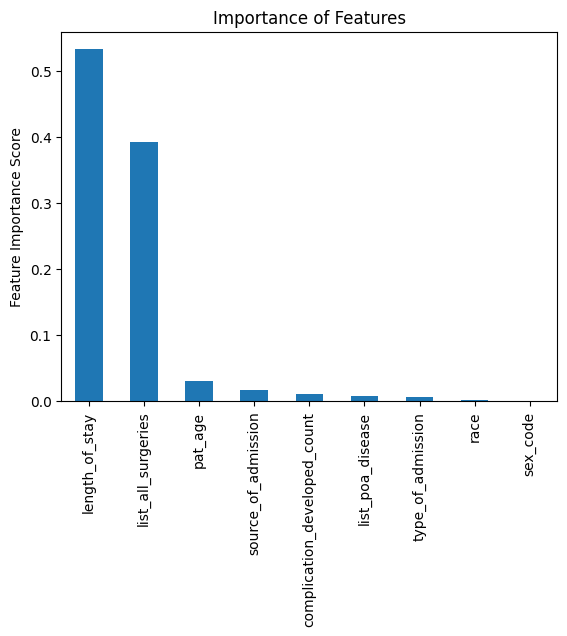

In [27]:
X = (df[['length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race','sex_code']]).astype(int)#input

y = (df['pat_status']).astype(int)#output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

# Parameter Tuning in Gradient Boosting (GBM) with Women

Accuracy of the GBM on test set: 0.931
              precision    recall  f1-score   support

           0       0.70      0.13      0.22     14833
           1       0.93      1.00      0.96    183988

    accuracy                           0.93    198821
   macro avg       0.82      0.56      0.59    198821
weighted avg       0.92      0.93      0.91    198821



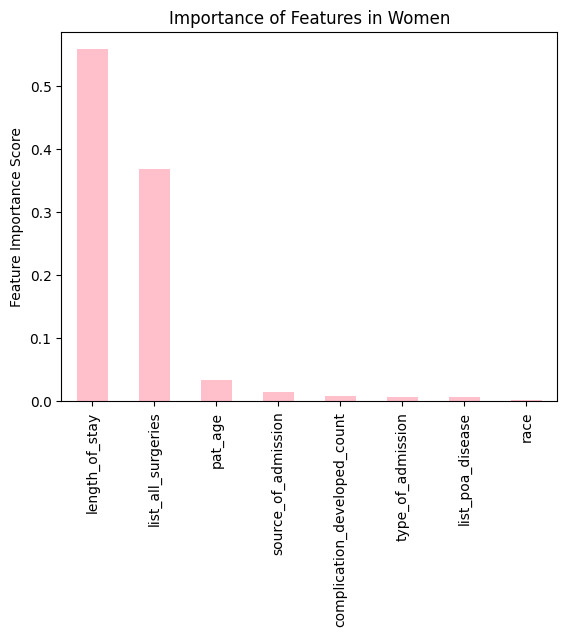

In [38]:
dfl1F = df[['length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race','sex_code','pat_status']].copy()
dfl1F=df.loc[df['sex_code'] == 1]
dfl1F = dfl1F.reset_index(drop=True)

X = dfl1F[['length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race']]#input

y = (dfl1F['pat_status']).astype(int)#output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
#feat_imp.plot(kind='bar', title='Importance of Features')
feat_imp.plot(kind='bar', title='Importance of Features in Women', color='pink')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

# **Parameter Tuning in Gradient Boosting (GBM) with Men**

Accuracy of the GBM on test set: 0.927
              precision    recall  f1-score   support

           0       0.72      0.21      0.32     15033
           1       0.93      0.99      0.96    165263

    accuracy                           0.93    180296
   macro avg       0.83      0.60      0.64    180296
weighted avg       0.91      0.93      0.91    180296



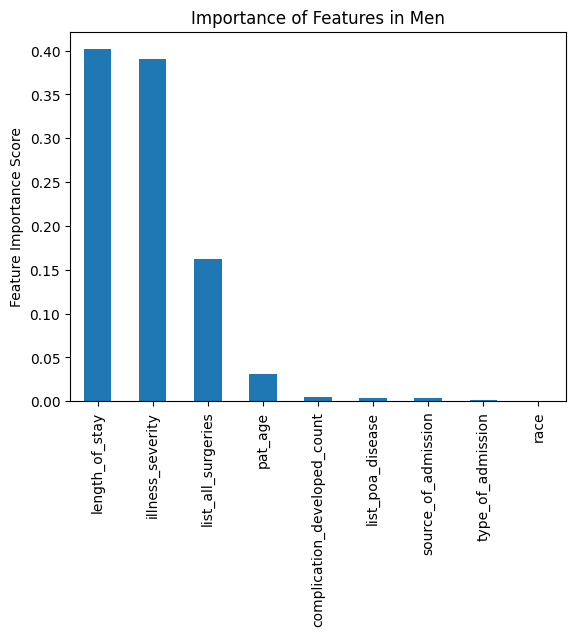

Bad pipe message: %s [b'\xe1\xc64E\xaa\xfc<\xacb`\x92t\xdc\xeb\xc8\t\xa7\xb2 \xee\x82\x04K\xdb\n\xb7\xa3\xdc\xf7\xf1\xf4\x969\x90\x9f\xf2\xa1\x19\x18\xc0']
Bad pipe message: %s [b'\xd3\x12\x18\x15\x03m\n4\xaf\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00']
Bad pipe message: %s [b'\xe5H\xc0\x98\xdda^u\x14\xdc\x17B\xa0\x9ey}*0 \x10\x90\x84\x97C\xf7\x88s\xb0\xa1\xe2\xb9L\x91\x0c#t\xdd+\xbc\x9c\xb3\xae\xc6J\xd4\x90\xe35\x03\x0b\x0b\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05', b'\x03\x08']
Bad pipe message: %s [b'\x08\x08\t\x08\n\x08']
Bad pipe message: %s [b'\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\

In [39]:
dfl1M = df[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race','sex_code','pat_status']].copy()
dfl1M=df.loc[df['sex_code'] == 0]
dfl1M = dfl1M.reset_index(drop=True)

X = dfl1M[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race']]#input

y = (dfl1M['pat_status']).astype(int)#output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features in Men')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

# RR Ratio(95 % CI)

In [33]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

reg = sm.Logit(y, X).fit()
reg.summary()

RR = reg.params  / (1 - reg.pvalues + (reg.pvalues * reg.params ))
conf = reg.conf_int()
conf['OR ratio'] = reg.params
conf['RR ratio'] = RR
#conf['pvalues'] = reg.pvalues
#conf['coef'] = reg.params.values
conf.columns = ["Lower CI", "Upper CI", "OR ratio","RR ratio"]
np.exp(conf)

Optimization terminated successfully.
         Current function value: 0.270088
         Iterations 7


,Lower CI,Upper CI,OR ratio,RR ratio
illness_severity,0.546466,0.558575,0.552487,0.552487
length_of_stay,1.083995,1.087144,1.085568,1.085568
type_of_admission,1.966176,2.055458,2.010322,2.010322
pat_age,1.059764,1.063352,1.061557,1.061557
list_poa_disease,0.993410,0.998803,0.996102,0.996084
complication_developed_count,0.937448,0.949855,0.943631,0.943631
list_all_surgeries,0.849600,0.853554,0.851575,0.851575
source_of_admission,0.923142,0.935535,0.929318,0.929318
race,1.911978,1.947478,1.929647,1.929647


# RR Ratio(95 % CI) For Female

In [30]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

dfl1F = df[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race','sex_code','pat_status']].copy()
dfl1F=df.loc[df['sex_code'] == 1]
dfl1F = dfl1F.reset_index(drop=True)

X = dfl1F[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race']]#input

y = (dfl1F['pat_status']).astype(int)#output

reg = sm.Logit(y, X).fit()
reg.summary()
RR = reg.params  / (1 - reg.pvalues + (reg.pvalues * reg.params ))
conf = reg.conf_int()
conf['OR ratio For Female'] = reg.params
conf['RR ratio For Female'] = RR
#conf['pvalues'] = reg.pvalues
#conf['coef'] = reg.params.values
conf.columns = ["Lower CI", "Upper CI", "OR ratio For Female","RR ratio For Female"]
np.exp(conf)


Optimization terminated successfully.
         Current function value: 0.249865
         Iterations 7


,Lower CI,Upper CI,OR ratio For Female,RR ratio For Female
illness_severity,0.556245,0.568677,0.562427,0.562427
length_of_stay,1.100731,1.104285,1.102506,1.102506
type_of_admission,2.025773,2.119043,2.071883,2.071883
pat_age,1.057411,1.061010,1.059209,1.059209
list_poa_disease,0.999924,1.005568,1.002742,1.002906
complication_developed_count,0.921101,0.934063,0.927560,0.927560
list_all_surgeries,0.820439,0.824725,0.822579,0.822579
source_of_admission,0.920432,0.932695,0.926543,0.926543
race,1.900661,1.936037,1.918267,1.918267


# RR Ratio(95 % CI) For Men

In [31]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

dfl1F = df[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race','sex_code','pat_status']].copy()
dfl1F=df.loc[df['sex_code'] == 0]
dfl1F = dfl1F.reset_index(drop=True)

X = dfl1F[['illness_severity','length_of_stay','type_of_admission','pat_age','list_poa_disease','complication_developed_count','list_all_surgeries','source_of_admission','race']]#input

y = (dfl1F['pat_status']).astype(int)#output

reg = sm.Logit(y, X).fit()
reg.summary()

RR = reg.params  / (1 - reg.pvalues + (reg.pvalues * reg.params ))
conf = reg.conf_int()
conf['OR ratio For Men'] = reg.params
conf['RR ratio For Men'] = RR
#conf['pvalues'] = reg.pvalues
#conf['coef'] = reg.params.values
conf.columns = ["Lower CI", "Upper CI", "OR ratio For Men","RR ratio For Men"]
np.exp(conf)

Optimization terminated successfully.
         Current function value: 0.270088
         Iterations 7


,Lower CI,Upper CI,OR ratio For Men,RR ratio For Men
illness_severity,0.546466,0.558575,0.552487,0.552487
length_of_stay,1.083995,1.087144,1.085568,1.085568
type_of_admission,1.966176,2.055458,2.010322,2.010322
pat_age,1.059764,1.063352,1.061557,1.061557
list_poa_disease,0.993410,0.998803,0.996102,0.996084
complication_developed_count,0.937448,0.949855,0.943631,0.943631
list_all_surgeries,0.849600,0.853554,0.851575,0.851575
source_of_admission,0.923142,0.935535,0.929318,0.929318
race,1.911978,1.947478,1.929647,1.929647


In [32]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

res = sm.Logit(y, X).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.270088
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             pat_status   No. Observations:               901478
Model:                          Logit   Df Residuals:                   901469
Method:                           MLE   Df Model:                            8
Date:                Tue, 24 Oct 2023   Pseudo R-squ.:                 0.05922
Time:                        04:37:07   Log-Likelihood:            -2.4348e+05
converged:                       True   LL-Null:                   -2.5880e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
illness_severity                -0.5933      0.006   -106.115      0.000      -0.604      -0.582
length_of_stay                   0.0821      0.001    110.926      0.000       0.081       0.084
type_of_admission                0.6983      0.011     61.639      0.000       0.676       0.720
pat_age                          0.0597      0.001     69.287      0.000       0.058       0.061
list_poa_disease                -0.0039      0.001     -2.828      0.005      -0.007      -0.001
complication_developed_count    -0.0580      0.003    -17.297      0.000      -0.065      -0.051
list_all_surgeries              -0.1607      0.001   -135.647      0.000      -0.163      -0.158
source_of_admission             -0.0733      0.003    -21.549      0.000      -0.080      -0.067
race                             0.6573      0.005    140.063      0.000       0.648       0.667
================================================================================================
"""